Let's solve a rubik's cube.

In [ ]:
%pip install torch matplotlib numpy

In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.colors as colors

class Cube:
    def __init__(self):
        self.cube = np.zeros((5,5,5))
        self.cube[0,1:4,1:4] += np.arange(1,10).reshape((3,3))+9*1
        self.cube[-1,1:4,1:4] += np.arange(1,10).reshape((3,3))+9*0
        self.cube[1:4,1:4,0] += np.arange(1,10).reshape((3,3))+9*2
        self.cube[1:4,1:4,-1] += np.arange(1,10).reshape((3,3))+9*3
        self.cube[1:4,0,1:4] += np.arange(1,10).reshape((3,3))+9*4
        self.cube[1:4,-1,1:4] += np.arange(1,10).reshape((3,3))+9*5


    @property
    def as_input(self):
        # return cube as input vector
        flat = self.cube.reshape((5*5*5))
        return torch.tensor(flat[flat != 0],dtype=int)

    @property
    def n(self):
        # null
        return self

    @property
    def f(self):
        # front clockwise
        self.cube[-2] = np.flip(self.cube[-2].T,1)
        self.cube[-1] = np.flip(self.cube[-1].T,1)
        return self

    @property
    def F(self):
        # front counter-clockwise
        self.cube[-2] = np.flip(self.cube[-2].T,0)
        self.cube[-1] = np.flip(self.cube[-1].T,0)
        return self

    @property
    def s(self):
        # mid x-y clockwise
        self.cube[2] = np.flip(self.cube[2].T,0)
        return self

    @property
    def S(self):
        # mid x-y counter-clockwise
        self.cube[2] = np.flip(self.cube[2].T,1)
        return self

    @property
    def b(self):
        # back clockwise
        self.cube[1] = np.flip(self.cube[1].T,0)
        self.cube[0] = np.flip(self.cube[0].T,0)
        return self

    @property
    def B(self):
        # back counter-clockwise
        self.cube[1] = np.flip(self.cube[1].T,1)
        self.cube[0] = np.flip(self.cube[0].T,1)
        return self

    @property
    def l(self):
        # left clockwise
        self.cube[:,:,:2] = np.rot90(self.cube[:,:,:2],axes=(0,1))
        return self

    @property
    def L(self):
        # left counter-clockwise
        self.cube[:,:,:2] = np.rot90(self.cube[:,:,:2],axes=(1,0))
        return self

    @property
    def m(self):
        # mix y-z clockwise
        self.cube[:,:,2] = np.rot90(self.cube[:,:,2],axes=(0,1))
        return self

    @property
    def M(self):
        # mix y-z counter-clockwise
        self.cube[:,:,2] = np.rot90(self.cube[:,:,2],axes=(1,0))
        return self

    @property
    def r(self):
        # right clockwise
        self.cube[:,:,3:] = np.rot90(self.cube[:,:,3:],axes=(0,1))
        return self

    @property
    def R(self):
        # right counter-clockwise
        self.cube[:,:,3:] = np.rot90(self.cube[:,:,3:],axes=(1,0))
        return self

    @property
    def u(self):
        # up clockwise
        self.cube[:,1] = np.flip(self.cube[:,1].T,-1)
        self.cube[:,0] = np.flip(self.cube[:,0].T,-1)
        return self

    @property
    def U(self):
        # up counter-clockwise
        self.cube[:,1] = np.flip(self.cube[:,1].T,0)
        self.cube[:,0] = np.flip(self.cube[:,0].T,0)
        return self

    @property
    def e(self):
        # mid x-z clockwise
        self.cube[:,2] = np.flip(self.cube[:,2].T,-1)
        return self

    @property
    def E(self):
        # mid x-z counter-clockwise
        self.cube[:,2] = np.flip(self.cube[:,2].T,0)
        return self

    @property
    def d(self):
        # down clockwise
        self.cube[:,-2] = np.flip(self.cube[:,-2].T,0)
        self.cube[:,-1] = np.flip(self.cube[:,-1].T,0)
        return self

    @property
    def D(self):
        # down counter-clockwise
        self.cube[:,-2] = np.flip(self.cube[:,-2].T,-1)
        self.cube[:,-1] = np.flip(self.cube[:,-1].T,-1)
        return self

    @property
    def train_set(self):
        # return all cube moves and current state as target
        moves = []
        moves.append(self.n.as_input)
        moves.append(self.f.as_input);self.F
        moves.append(self.F.as_input);self.f
        moves.append(self.s.as_input);self.S
        moves.append(self.S.as_input);self.s
        moves.append(self.b.as_input);self.B
        moves.append(self.B.as_input);self.b
        moves.append(self.l.as_input);self.L
        moves.append(self.L.as_input);self.l
        moves.append(self.m.as_input);self.M
        moves.append(self.M.as_input);self.m
        moves.append(self.r.as_input);self.R
        moves.append(self.R.as_input);self.r
        moves.append(self.u.as_input);self.U
        moves.append(self.U.as_input);self.u
        moves.append(self.e.as_input);self.E
        moves.append(self.E.as_input);self.e
        moves.append(self.d.as_input);self.D
        moves.append(self.D.as_input);self.d
        return torch.stack(moves), torch.stack([self.as_input for _ in range(19)])



In [21]:
# helper
def cat(x):
    return torch.concat([x[-1][0],x[-1][1],x[-2][1]],dim=1)

def cubeStep(cube):
    ts.append(cube.train_set)
    ips.append(cat(ts))
    tgs.append(ts[-1][1])


C = Cube()
ts = [(C.train_set[1],C.train_set[1])]
ips = []
tgs = []

cubeStep(C)
for _ in range(110):
    cubeStep(C.m)
    cubeStep(C.r)
    cubeStep(C.M)
    cubeStep(C.d)
    cubeStep(C.l)
    cubeStep(C.u)
    cubeStep(C.D)

C = Cube()
cubeStep(C)
for _ in range(110):
    cubeStep(C.R)
    cubeStep(C.U)

# C = Cube()
# cubeStep(C)
# for _ in range(6):
#     cubeStep(C.R)
#     cubeStep(C.d)
#     cubeStep(C.r)
#     cubeStep(C.D)


inputs = torch.concat(ips,dim=0) - 1
targets = torch.concat(tgs,dim=0) - 1

inputs.shape, targets.shape

(torch.Size([18848, 162]), torch.Size([18848, 54]))

In [4]:
# create a random torch tensor with shape (54,54)
embs = torch.randn((54,54))/54
emb_size = 54*54
posEmbs = torch.nn.Embedding(32,54*54*3)

In [22]:
inputs = torch.stack([embs[n].view(emb_size*3) for n in inputs])
targets = torch.stack([embs[n].view(emb_size) for n in targets])

inputs.shape, targets.shape

(torch.Size([18848, 8748]), torch.Size([18848, 2916]))

In [6]:
multihead_attn = torch.nn.MultiheadAttention(emb_size*3, 1)
wi = torch.rand(inputs.shape[1], 4000)/(inputs.shape[1]+1)**0.5
bi = torch.rand(4000,)/(inputs.shape[1]+1)**0.5
wo = torch.rand(4000, targets.shape[1])/4001**0.5
bo = torch.rand(targets.shape[1],)/4001**0.5


p = [wi,bi,wo,bo]
for param in p:
    param.requires_grad = True

optimizer = torch.optim.Adam(p)

In [7]:
lossi = []

In [23]:
for _ in range(60):
    optimizer.zero_grad()
    batch = torch.randint(0, inputs.shape[0], (32,))
    att = inputs[batch] + posEmbs(torch.arange(32))
    attn_output, attn_output_weights = multihead_attn(att, att, att)

    o = torch.tanh(attn_output @ wi + bi)
    o2 = o @ wo + bo
    loss = F.mse_loss(o2,targets[batch])
    loss.backward()
    optimizer.step()
    lossi.append(loss.item())
plt.plot(lossi)

: 

: 

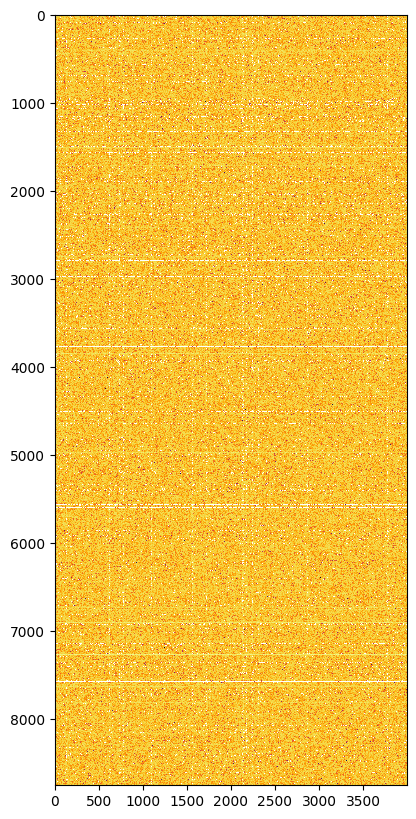

In [11]:
plt.figure(figsize=(30,10))
plt.imshow(wi.detach().numpy(), norm=colors.LogNorm(vmin=wi.min(), vmax=wi.max()), cmap='inferno', interpolation='nearest')
plt.show()

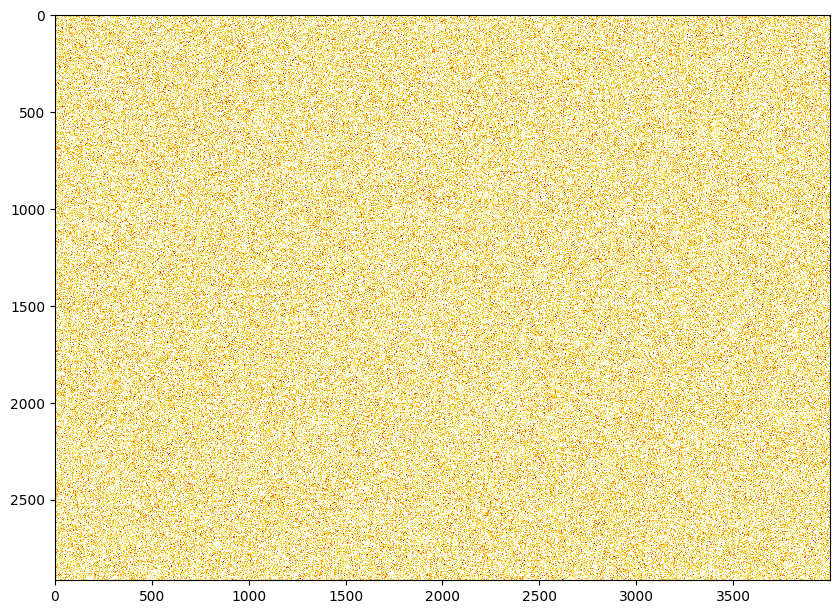

In [14]:
plt.figure(figsize=(10,30))
plt.imshow(wo.T.detach().numpy(),  norm=colors.LogNorm(vmin=wo.min(), vmax=wo.max()), cmap='inferno', interpolation='nearest')
plt.show()

In [20]:
# test
T = Cube()
to = embs[T.as_input-1].view(emb_size)
ti = embs[torch.concat([T.as_input,T.R.as_input,T.R.U.as_input][::-1])-1].view(emb_size*3).reshape(1,-1)
att = ti + posEmbs(torch.arange(1))
attn_output, attn_output_weights = multihead_attn(ti, ti, ti)
o = torch.tanh(attn_output @ wi + bi)
o2 = o @ wo + bo

(o2[0]-to)[:54]

tensor([ 0.0148, -0.0051,  0.0026,  0.0298,  0.0112,  0.0024,  0.0083,  0.0299,
         0.0196, -0.0141, -0.0134, -0.0171,  0.0655,  0.0002, -0.0161, -0.0105,
        -0.0089,  0.0307, -0.0256,  0.0183,  0.0350, -0.0263, -0.0071,  0.0106,
        -0.0136, -0.0195,  0.0332,  0.0228, -0.0002,  0.0207,  0.0148,  0.0161,
        -0.0121, -0.0044,  0.0290,  0.0388,  0.0020, -0.0116,  0.0193,  0.0039,
         0.0405, -0.0015,  0.0221, -0.0012,  0.0022,  0.0025, -0.0250, -0.0139,
         0.0012, -0.0106, -0.0570,  0.0254, -0.0030,  0.0318],
       grad_fn=<SliceBackward0>)

In [18]:
o2[0][:54]

tensor([ 1.0816e-02,  4.9601e-03,  4.6826e-03,  4.5357e-03,  1.2977e-02,
         5.4489e-03, -2.3647e-03,  8.6936e-03, -4.8803e-03,  4.4903e-03,
         9.6773e-03,  7.2294e-03,  1.2497e-02,  6.8011e-03, -2.9186e-03,
        -9.5169e-04,  8.5569e-05,  4.6607e-03, -9.5952e-04,  7.4749e-03,
         9.9748e-03, -2.1882e-03,  4.5346e-03,  1.1990e-02,  2.4728e-03,
        -9.4059e-04,  5.2593e-03,  1.2852e-02, -2.9215e-03,  3.3608e-03,
         7.6064e-03,  1.2837e-02,  2.3514e-03,  4.4972e-03,  4.1754e-03,
         5.4789e-03,  1.1061e-02,  9.1675e-04,  1.5122e-03,  4.4494e-03,
        -7.8903e-05,  1.0254e-02,  7.9976e-03,  8.7379e-03,  9.3994e-03,
         8.5769e-03,  2.5387e-05,  4.0344e-03,  8.5468e-03,  9.4306e-03,
         2.1495e-03,  7.3111e-04,  9.8262e-03,  1.0358e-02],
       grad_fn=<SliceBackward0>)

In [19]:
to[:54]

tensor([-0.0040,  0.0100,  0.0020, -0.0252,  0.0018,  0.0030, -0.0107, -0.0212,
        -0.0244,  0.0186,  0.0231,  0.0243, -0.0530,  0.0066,  0.0131,  0.0096,
         0.0090, -0.0260,  0.0246, -0.0109, -0.0250,  0.0241,  0.0116,  0.0014,
         0.0161,  0.0186, -0.0279, -0.0099, -0.0027, -0.0174, -0.0072, -0.0032,
         0.0145,  0.0089, -0.0249, -0.0333,  0.0090,  0.0125, -0.0178,  0.0006,
        -0.0406,  0.0117, -0.0141,  0.0100,  0.0072,  0.0061,  0.0250,  0.0179,
         0.0074,  0.0201,  0.0591, -0.0247,  0.0128, -0.0215])

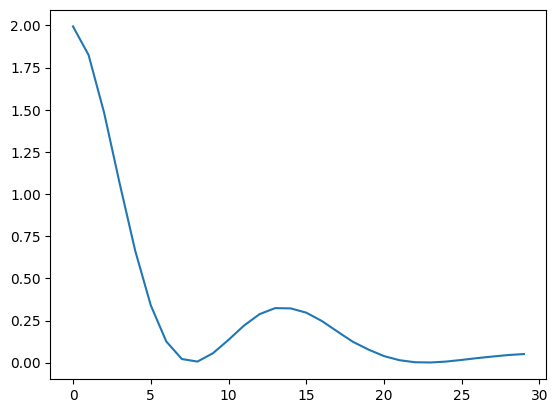

In [10]:
plt.plot(lossi[-30:])